Implementing the **Poisson Model of Spike Generation** according to David Heeger's paper of the same name from 2000

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy as sp
from scipy import signal


In [2]:
dt = 0.001          # in s
n_steps = 500       # number of time steps
firing_rate = 300.  # number of spikes per second


In [3]:
def poisson_spiketrain(n_steps, dt, firing_rate):
    spike_train = np.zeros(n_steps)
    spike_train_rand = np.random.rand(n_steps)
    for i in np.arange(n_steps):
        if spike_train_rand[i] < firing_rate*dt:
            spike_train[i]=1
    return spike_train    

In [72]:
spikes = poisson_spiketrain(n_steps, dt, firing_rate)
print(np.shape(np.where(spikes != 0)))
print(spikes[1:20])

(1, 155)
[ 0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.
  0.]


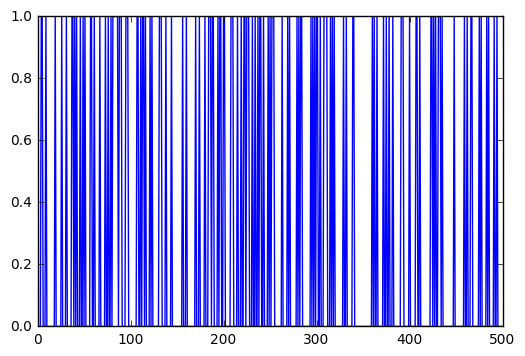

In [5]:
plt.plot(spikes)

Fano factor: F = sigma_n²/E[n]; should be F=1 for a Poisson process

In [6]:
def compute_intervalls(spikes):
    return

# Filtering for computing the spike rate

## Filtering by convoluting the spike train signal with a rectangular kernel

('scaling factor: ', 250.0)


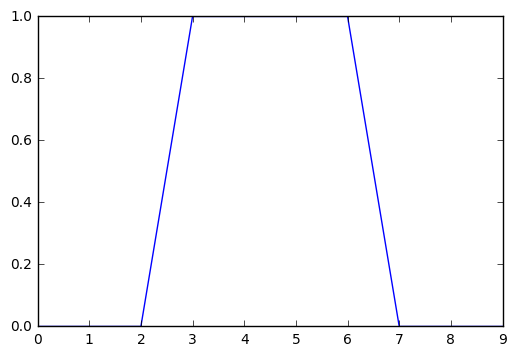

In [36]:
rect_kernel = np.array([0,0,0,1,1,1,1,0,0,0])
plt.plot(rect_kernel)
scaling_factor = 1./np.sum(rect_kernel)*1/dt
print('scaling factor: ',scaling_factor)

In [47]:
def rect_convolution(spikes,rect_kernel,scaling_factor):
    rect_rate = np.convolve(spikes,rect_kernel,mode='same')*scaling_factor
    return rect_rate

In [49]:
rect_rate = rect_convolution(spikes,rect_kernel,scaling_factor)

[ 0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[   0.    0.  250.  500.  500.  500.  250.  250.  250.  250.  250.    0.
    0.    0.]
('the mean fire rate is', 276.0)


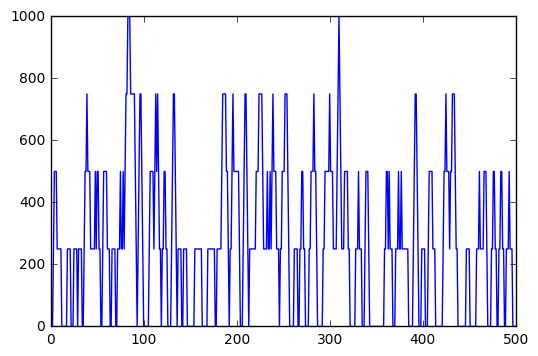

In [50]:
plt.plot(rect_rate)
print(spikes[1:15])
print(rect_rate[1:15])
mean_fire_rate = np.mean(rect_rate)
print('the mean fire rate is',mean_fire_rate)

The mean firing rate after the filtering is very close to the firing rate which we have set to 300 Hz in the beginning

## Filtering by convoluting the spike train signal with a gaussian kernel

[ 0.05958732  0.104579    0.17242162  0.26705184  0.38855813  0.53109599
  0.68194075  0.82257756  0.93210249  0.99221794  0.99221794  0.93210249
  0.82257756  0.68194075  0.53109599  0.38855813  0.26705184  0.17242162
  0.104579    0.05958732]
('scaling factor: ', 100.96660088760851)


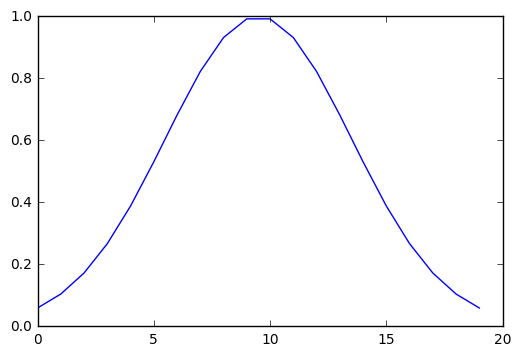

In [60]:
kernel_size = 20 
# the kernel size of the gaussian window depends on the time resolution in which 
# we want to investigate the spike train signal
gaussian_kernel = signal.gaussian(kernel_size, std=4)
print(gaussian_kernel)
plt.plot(gaussian_kernel)
scaling_factor = 1/np.sum(gaussian_kernel)*1/dt
print('scaling factor: ',scaling_factor)

In [61]:
def gaussian_convolution(spikes,gaussian_kernel,scaling_factor):
    gauss_rate = np.convolve(spikes,gaussian_kernel,mode='same')*scaling_factor
    return gauss_rate

('the mean fire rate is', 275.44423905585904)


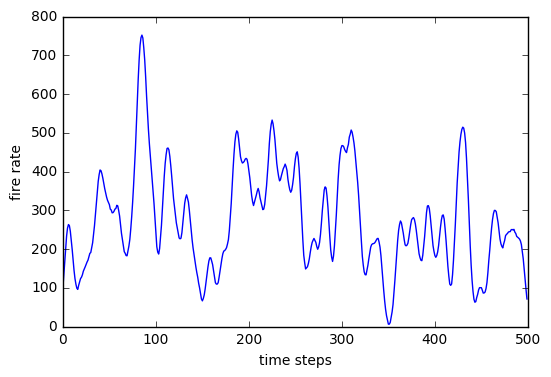

In [62]:
gauss_rate = gaussian_convolution(spikes,gaussian_kernel,scaling_factor)
plt.plot(gauss_rate)
plt.xlabel('time steps')
plt.ylabel('fire rate')
mean_fire_rate_2 = np.mean(gauss_rate)
print('the mean fire rate is',mean_fire_rate_2)

## Filtering by convoluting the spike train signal with an alpha kernel

In [65]:
f = lambda x: x*np.exp(2-x)
alpha_kernel = np.zeros((kernel_size,))
for i in range(kernel_size):
    alpha_kernel[i]=f(i*0.3)
    
scaling_factor2 = 1/np.sum(alpha_kernel)*1/dt

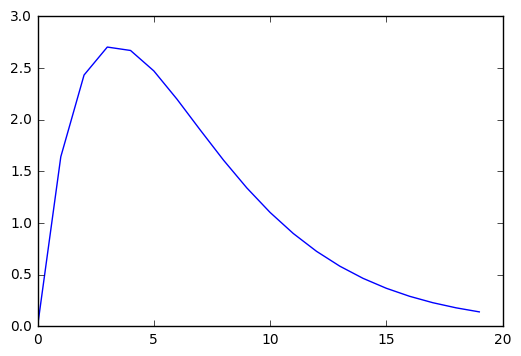

In [66]:
plt.plot(alpha_kernel)

In [67]:
def alpha_convolution(spikes,alpha_kernel,scaling_factor):
    alpha_rate = np.convolve(spikes,alpha_kernel,mode='same')*scaling_factor
    return alpha_rate

('the mean fire rate is', 274.51746201280531)


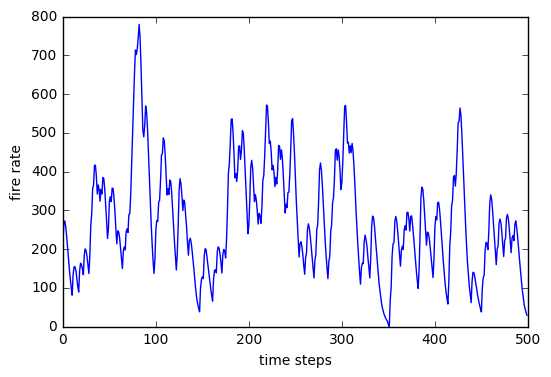

In [68]:
alpha_rate = alpha_convolution(spikes,alpha_kernel,scaling_factor2)
plt.plot(alpha_rate)
plt.xlabel('time steps')
plt.ylabel('fire rate')
mean_fire_rate_3 = np.mean(alpha_rate)
print('the mean fire rate is',mean_fire_rate_3)